### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?
- SVR

In [1]:
import pandas as pd

df = pd.read_csv("data1/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Regresión polinómica no lineal

In [3]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error

import numpy as np

Column : Avg. Area Income
Highest training score was --> 0.41215117541705515 for degree : 2
Highest test score was --> 0.4006439993037627 for degree : 4


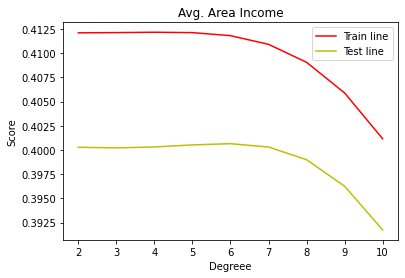

------------------- 
 -------------------
Column : Avg. Area House Age
Highest training score was --> 0.212380371173294 for degree : 8
Highest test score was --> 0.1878487211420784 for degree : 8


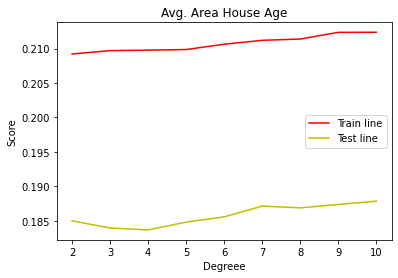

------------------- 
 -------------------
Column : Avg. Area Number of Rooms
Highest training score was --> 0.11576254363862137 for degree : 8
Highest test score was --> 0.11396948316561462 for degree : 0


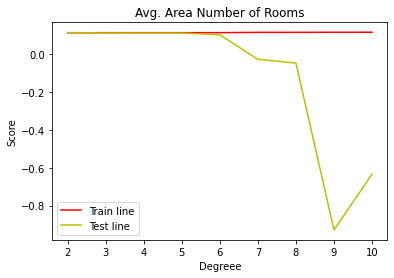

------------------- 
 -------------------
Column : Avg. Area Number of Bedrooms
Highest training score was --> 0.0366306341628021 for degree : 8
Highest test score was --> 0.032081814797209174 for degree : 4


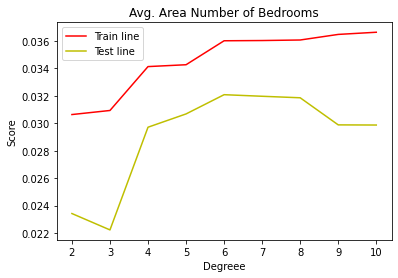

------------------- 
 -------------------
Column : Area Population
Highest training score was --> 0.16697229144526948 for degree : 1
Highest test score was --> 0.16648757924271973 for degree : 0


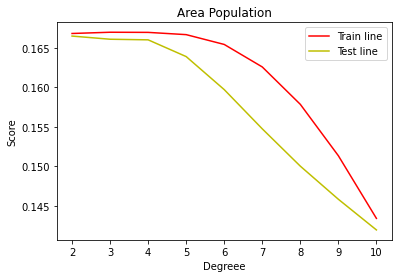

------------------- 
 -------------------


In [37]:
y = df['Price'].values.reshape(-1,1)

for col in df.columns[:5]:
    X = df[col].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_score_l = []
    test_score_l = []

    
    for degree in list(range(2,11)):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train)

        lin_reg_model = LinearRegression()
        lin_reg_model.fit(X_poly, y_train)
        train_score = lin_reg_model.score(X_poly, y_train)
        X_test_poli = poly.fit_transform(X_test)
        test_score = lin_reg_model.score(X_test_poli, y_test)
        train_score_l.append(train_score)
        test_score_l.append(test_score)

    print(f'Column : {col}')  
    print('Highest training score was -->', max(train_score_l), 'for degree :', train_score_l.index(max(train_score_l)))    
    print('Highest test score was -->', max(test_score_l), 'for degree :', test_score_l.index(max(test_score_l)))
    plt.plot(list(range(2,11)), train_score_l, color='r')
    plt.plot(list(range(2,11)), test_score_l, color='y')
    plt.legend(['Train line', 'Test line'])
    plt.title('{}'.format(col))
    plt.xlabel('Degreee')
    plt.ylabel('Score')
    plt.show()
    print('-------------------', '\n', '-------------------')

Dependiendo de las columnas el score se estanca o incluso decrece

Highest training score was --> 0.91842374416283 for degree : 3
Highest test score was --> 0.9212579241287193 for degree : 1


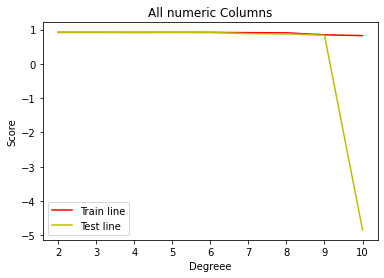

In [35]:
y = df['Price'].values.reshape(-1,1)
X = df.loc[:,'Avg. Area Income': 'Area Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_score_l = []
test_score_l = []

for degree in list(range(2,11)):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train)

        lin_reg_model = LinearRegression()
        lin_reg_model.fit(X_poly, y_train)
        train_score = lin_reg_model.score(X_poly, y_train)
        X_test_poli = poly.fit_transform(X_test)
        test_score = lin_reg_model.score(X_test_poli, y_test)
        train_score_l.append(train_score)
        test_score_l.append(test_score)

print('Highest training score was -->', max(train_score_l), 'for degree :', train_score_l.index(max(train_score_l)))    
print('Highest test score was -->', max(test_score_l), 'for degree :', test_score_l.index(max(test_score_l)))
plt.plot(list(range(2,11)), train_score_l, color='r')
plt.plot(list(range(2,11)), test_score_l, color='y')
plt.legend(['Train line', 'Test line'])
plt.title('All numeric Columns')
plt.xlabel('Degreee')
plt.ylabel('Score')
plt.show()

When considering all columns the score seems to be pretty much constant until it reaches a polinomical degree of 10 wen it suddenly drops to negative numbers.

In [38]:
# SVR 
from sklearn.svm import SVR

y = df['Price'].values.reshape(-1,1)

train_score_d = {}
test_score_d = {}

for col in df.columns[:5]:
    X = df[col].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    svr_poly = SVR(kernel='poly', C=100)
    svr_poly.fit(X_train, y_train)
    train_score_d[f'{col}'] = svr_poly.score(X_train, y_train)
    test_score_d[f'{col}'] = svr_poly.score(X_test, y_test)

print('Train scores --->', train_score_d)
print('Test scores --->', test_score_d)

Train scores ---> {'Avg. Area Income': 0.3945495742922247, 'Avg. Area House Age': 0.2005519737934135, 'Avg. Area Number of Rooms': 0.11781460658326526, 'Avg. Area Number of Bedrooms': 0.02762847426195969, 'Area Population': 0.14254674798452116}
Test scores ---> {'Avg. Area Income': 0.40585422265877724, 'Avg. Area House Age': 0.16618189304967002, 'Avg. Area Number of Rooms': 0.07648668711312667, 'Avg. Area Number of Bedrooms': 0.016321000463837554, 'Area Population': 0.1532670090293835}


In [53]:
y = df['Price'].values.reshape(-1,1)
X = df.loc[:,'Avg. Area Income': 'Area Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svr_poly = SVR(kernel='poly', C=100)
svr_poly.fit(X_train, y_train)
print('Train score =', svr_poly.score(X_train, y_train))
print('Test score =', svr_poly.score(X_test, y_test))

Train score = 0.35088129880324104
Test score = 0.37316400451023424


### 2. Se pide:

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- El punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- El punto 4, espera que tu X sean todas las columnas que cumplen con las características especificadas e y la columna 'Avg. Area Number of Bedrooms'

In [79]:
df['Rounded numb. bedrooms'] = np.array([round(x) for x in df['Avg. Area Number of Bedrooms'].values])

In [80]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'Rounded numb. bedrooms'],
      dtype='object')

In [83]:
# Classification by column
from sklearn.svm import SVC 

Xcols = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']]
y = df['Rounded numb. bedrooms'].values.reshape(-1,1)

train_score_d = {}
test_score_d = {}

for col in Xcols.columns[:5]:
    X = df[col].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    svr_poly = SVC(C=1000, kernel='rbf', gamma=10)
    svr_poly.fit(X_train, y_train)
    train_score_d[f'{col}'] = svr_poly.score(X_train, y_train)
    test_score_d[f'{col}'] = svr_poly.score(X_test, y_test)

print('Train scores --->', train_score_d)
print('Test scores --->', test_score_d)

Train scores ---> {'Avg. Area Income': 0.99975, 'Avg. Area House Age': 0.31975, 'Avg. Area Number of Rooms': 0.3485, 'Area Population': 0.99875, 'Price': 0.99975}
Test scores ---> {'Avg. Area Income': 0.289, 'Avg. Area House Age': 0.337, 'Avg. Area Number of Rooms': 0.288, 'Area Population': 0.291, 'Price': 0.284}


No tiene sentido hablar de correlación cuando se tienen en cuenta valores categóricos. La columna que mejor clasificación ha hecho de Avg. Area Number of Bedrooms modificado es la Avg. Area House Age.

In [126]:
# Classification with all numeric columns

y = df['Rounded numb. bedrooms'].values.reshape(-1,1)
Xcols = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']].values
X_train, X_test, y_train, y_test = train_test_split(Xcols, y, test_size=0.2)

svr_poly = SVC(C=1000, kernel='rbf', gamma=10)
svr_poly.fit(X_train, y_train)
print('Train score =', svr_poly.score(X_train, y_train))
print('Test score =', svr_poly.score(X_test, y_test))

Train score = 1.0
Test score = 0.283
